# Library Import and Data Loading

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.pardir, 'src')))

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import cnn
from utils import calculate_f1_macro

2025-05-28 23:14:10.470364: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 23:14:13.457872: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 23:14:16.164590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748448857.764485   32795 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748448858.124533   32795 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748448859.785097   32795 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# load and preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes = cnn.load_and_preprocess_cifar10()

x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


# Hyperparameter Analysis

In [4]:
results = {}
best_f1 = -1
best_keras_cnn = None

analysis_epochs = 10


=== 1. Analisis Pengaruh Jumlah Layer Konvolusi ===

--- Training CNN: NumConvLayers_1 ---
Conv Layers: [(32, (3, 3))], Pooling: max, Global Pooling: False


2025-05-28 23:14:56.248175: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-28 23:14:56.831043: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.3490 - loss: 1.8125 - val_accuracy: 0.5175 - val_loss: 1.3609
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5460 - loss: 1.2856 - val_accuracy: 0.5629 - val_loss: 1.2526
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6017 - loss: 1.1459 - val_accuracy: 0.5996 - val_loss: 1.1468
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6281 - loss: 1.0628 - val_accuracy: 0.6139 - val_loss: 1.1091
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6524 - loss: 0.9985 - val_accuracy: 0.6080 - val_loss: 1.1150
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.6717 - loss: 0.9451 - val_accuracy: 0.6180 - val_loss: 1.0993
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6925 - loss: 0.8836 - val_accuracy: 0.6336 - val_loss: 1.0616
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7118 - loss: 0.8278 - val_accurac

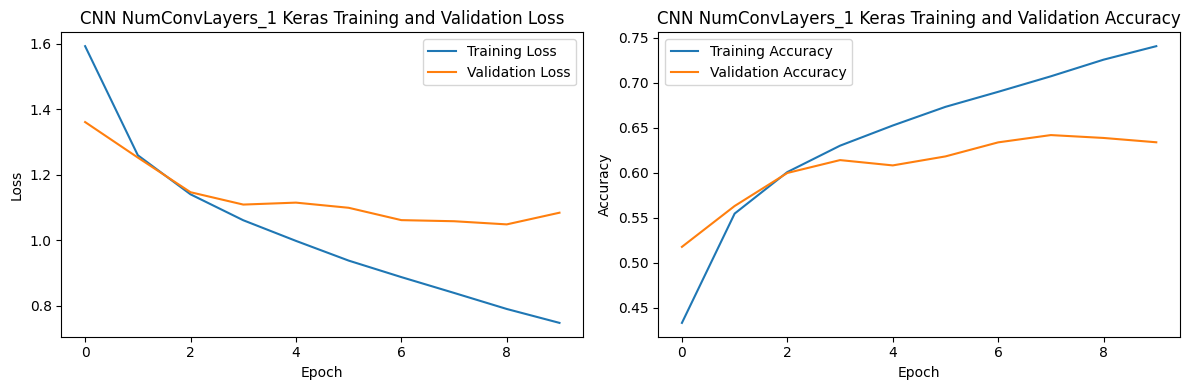

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy (Keras): 0.6362
Macro F1-Score (Keras): 0.6350

--- Training CNN: NumConvLayers_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-28 23:18:02.209515: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.3515 - loss: 1.7759 - val_accuracy: 0.5391 - val_loss: 1.3016
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5858 - loss: 1.1701 - val_accuracy: 0.6125 - val_loss: 1.1138
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6505 - loss: 0.9977 - val_accuracy: 0.6491 - val_loss: 1.0266
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6808 - loss: 0.9010 - val_accuracy: 0.6689 - val_loss: 0.9500
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7170 - loss: 0.8169 - val_accuracy: 0.6845 - val_loss: 0.9162
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7369 - loss: 0.7506 - val_accuracy: 0.6795 - val_loss: 0.9143
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7539 - loss: 0.7036 - val_accuracy: 0.6878 - val_loss: 0.9125
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7796 - loss: 0.6394 - val_accurac

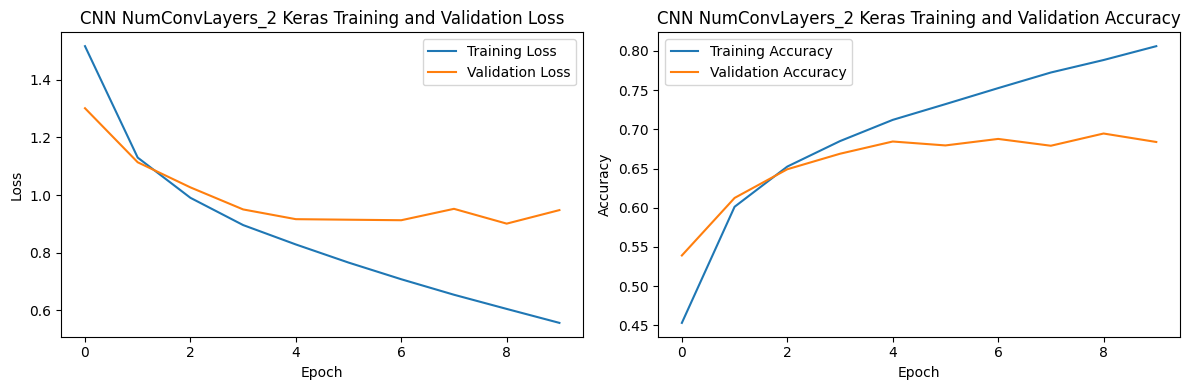

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test Accuracy (Keras): 0.6940
Macro F1-Score (Keras): 0.6928

--- Training CNN: NumConvLayers_3 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3)), (128, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool3 (MaxPooling2D)         │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-28 23:22:59.567194: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.3271 - loss: 1.8223 - val_accuracy: 0.5596 - val_loss: 1.2232
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5894 - loss: 1.1545 - val_accuracy: 0.6404 - val_loss: 1.0285
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.6769 - loss: 0.9277 - val_accuracy: 0.6867 - val_loss: 0.9092
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7168 - loss: 0.8116 - val_accuracy: 0.7115 - val_loss: 0.8357
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7635 - loss: 0.6831 - val_accuracy: 0.7137 - val_loss: 0.8107
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.7839 - loss: 0.6113 - val_accuracy: 0.7265 - val_loss: 0.8056
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.8132 - loss: 0.5356 - val_accuracy: 0.7294 - val_loss: 0.8212
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8352 - loss: 0.4717 - val_accurac

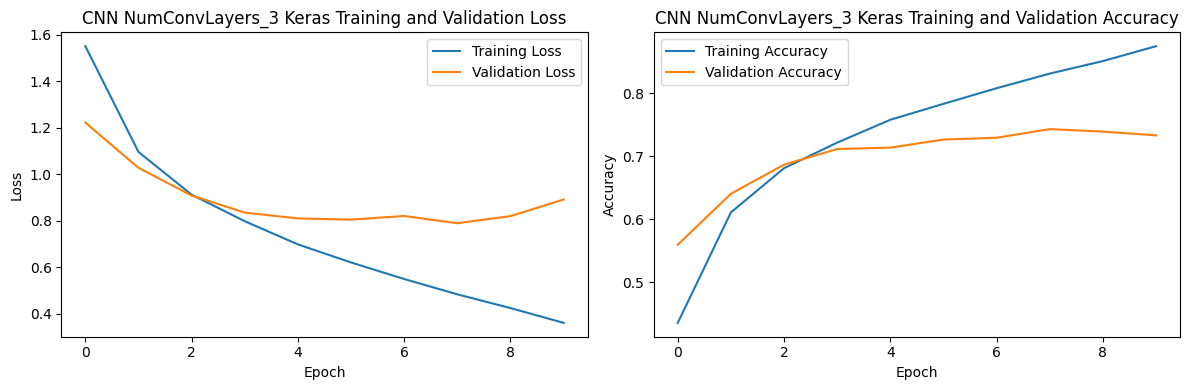

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Test Accuracy (Keras): 0.7358
Macro F1-Score (Keras): 0.7348


In [5]:
print("\n=== 1. Analisis Pengaruh Jumlah Layer Konvolusi ===")
num_conv_layer_variations = [
    [(32, (3,3))],                                  
    [(32, (3,3)), (64, (3,3))],                     
    [(32, (3,3)), (64, (3,3)), (128, (3,3))]
]
for i, config in enumerate(num_conv_layer_variations):
    desc = f"NumConvLayers_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc 
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_cnn = keras_model_variant

penjelasan


=== 2. Analisis Pengaruh Banyak Filter ===

--- Training CNN: NumFilters_1 ---
Conv Layers: [(16, (3, 3)), (32, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,650 (1.02 MB)

 Trainable params: 268,650 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-28 23:27:39.541875: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3500 - loss: 1.7923 - val_accuracy: 0.5337 - val_loss: 1.3073
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5629 - loss: 1.2437 - val_accuracy: 0.6005 - val_loss: 1.1565
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6220 - loss: 1.0809 - val_accuracy: 0.6236 - val_loss: 1.0865
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6560 - loss: 0.9881 - val_accuracy: 0.6398 - val_loss: 1.0320
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6837 - loss: 0.9062 - val_accuracy: 0.6528 - val_loss: 1.0046
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6984 - loss: 0.8618 - val_accuracy: 0.6680 - val_loss: 0.9607
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7221 - loss: 0.7945 - val_accuracy: 0.6700 - val_loss: 0.9506
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7389 - loss: 0.7467 - val_accuracy:

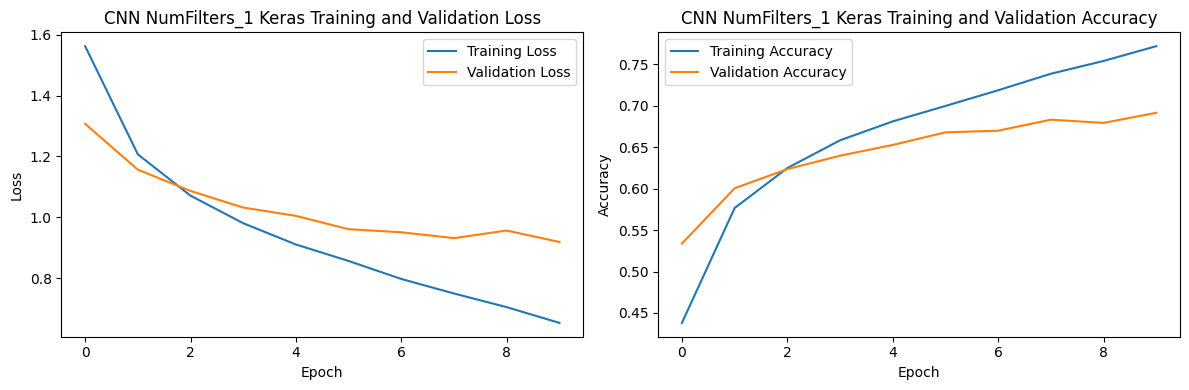

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.6872
Macro F1-Score (Keras): 0.6886

--- Training CNN: NumFilters_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-28 23:29:17.936987: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3772 - loss: 1.7166 - val_accuracy: 0.5973 - val_loss: 1.1808
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6071 - loss: 1.1177 - val_accuracy: 0.6332 - val_loss: 1.0452
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.6672 - loss: 0.9601 - val_accuracy: 0.6635 - val_loss: 0.9759
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.7000 - loss: 0.8663 - val_accuracy: 0.6797 - val_loss: 0.9290
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.7293 - loss: 0.7816 - val_accuracy: 0.6796 - val_loss: 0.9214
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7508 - loss: 0.7163 - val_accuracy: 0.6879 - val_loss: 0.9163
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.7750 - loss: 0.6440 - val_accuracy: 0.6957 - val_loss: 0.9000
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7992 - loss: 0.5794 - val_accurac

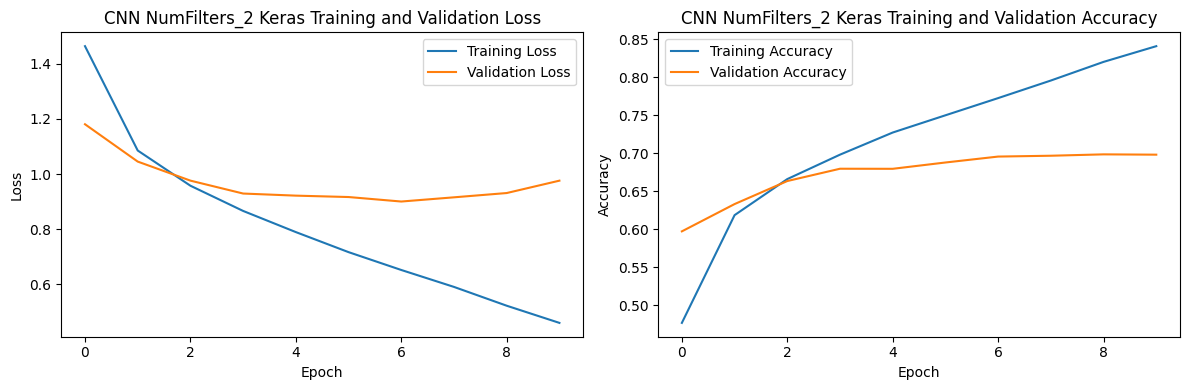

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy (Keras): 0.6949
Macro F1-Score (Keras): 0.6966

--- Training CNN: NumFilters_3 ---
Conv Layers: [(64, (3, 3)), (128, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.3810 - loss: 1.7039 - val_accuracy: 0.5654 - val_loss: 1.2244
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.6176 - loss: 1.0860 - val_accuracy: 0.6468 - val_loss: 0.9930
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6855 - loss: 0.8983 - val_accuracy: 0.6851 - val_loss: 0.9055
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7242 - loss: 0.7879 - val_accuracy: 0.6870 - val_loss: 0.9041
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7589 - loss: 0.6879 - val_accuracy: 0.7058 - val_loss: 0.8614
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7830 - loss: 0.6149 - val_accuracy: 0.7168 - val_loss: 0.8331
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8156 - loss: 0.5285 - val_accuracy: 0.6997 - val_loss: 0.9098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8431 - loss: 0.4493 - 

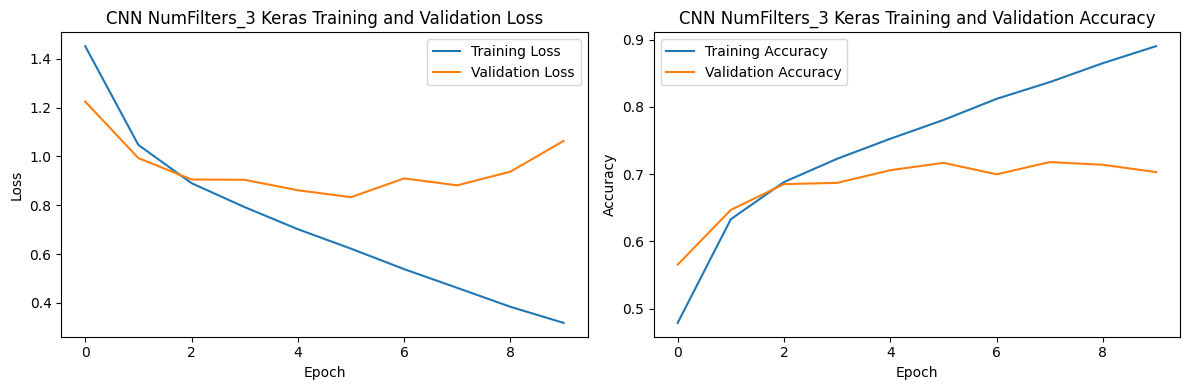

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Test Accuracy (Keras): 0.6931
Macro F1-Score (Keras): 0.6924


In [6]:
print("\n=== 2. Analisis Pengaruh Banyak Filter ===")
filter_variations = [
    [(16, (3,3)), (32, (3,3))], 
    [(32, (3,3)), (64, (3,3))], 
    [(64, (3,3)), (128, (3,3))] 
]
for i, config in enumerate(filter_variations):
    desc = f"NumFilters_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: best_f1 = f1_score_keras; best_model_cnn = keras_model_variant


penjelasan


=== 3. Analisis Pengaruh Ukuran Filter ===

--- Training CNN: KernelSize_1 ---
Conv Layers: [(32, (2, 2)), (64, (2, 2))], Pooling: max, Global Pooling: False


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,378 (2.04 MB)

 Trainable params: 534,378 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.3728 - loss: 1.7321 - val_accuracy: 0.5763 - val_loss: 1.2182
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5847 - loss: 1.1801 - val_accuracy: 0.6230 - val_loss: 1.0854
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6375 - loss: 1.0317 - val_accuracy: 0.6468 - val_loss: 1.0218
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6698 - loss: 0.9372 - val_accuracy: 0.6659 - val_loss: 0.9743
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6983 - loss: 0.8633 - val_accuracy: 0.6562 - val_loss: 0.9905
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7215 - loss: 0.7987 - val_accuracy: 0.6819 - val_loss: 0.9141
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7433 - loss: 0.7338 - val_accuracy: 0.6762 - val_loss: 0.9599
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7572 - loss: 0.6860 - 

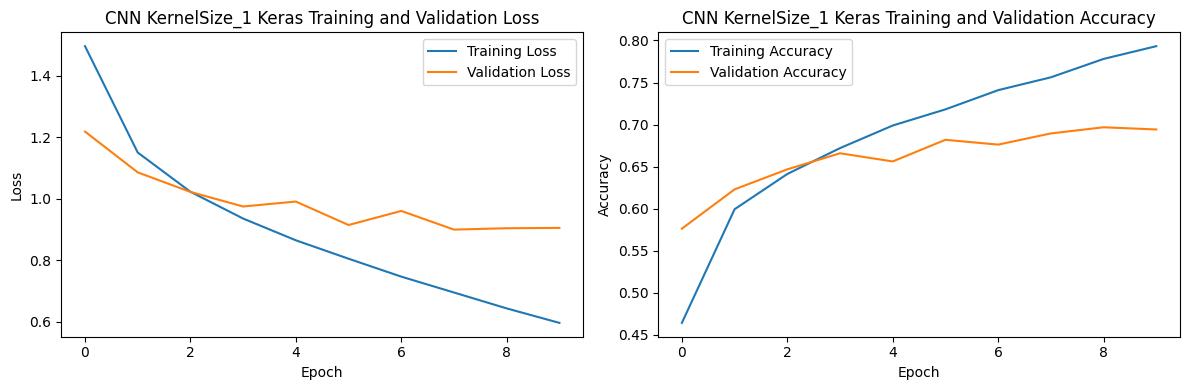

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy (Keras): 0.6948
Macro F1-Score (Keras): 0.6934

--- Training CNN: KernelSize_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3629 - loss: 1.7573 - val_accuracy: 0.5682 - val_loss: 1.2459
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5897 - loss: 1.1722 - val_accuracy: 0.6338 - val_loss: 1.0575
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6496 - loss: 0.9953 - val_accuracy: 0.6605 - val_loss: 0.9714
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6903 - loss: 0.8906 - val_accuracy: 0.6740 - val_loss: 0.9495
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7152 - loss: 0.8090 - val_accuracy: 0.6924 - val_loss: 0.9020
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7464 - loss: 0.7258 - val_accuracy: 0.6838 - val_loss: 0.9149
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7752 - loss: 0.6492 - val_accuracy: 0.6857 - val_loss: 0.9177
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7914 - loss: 0.5979 - 

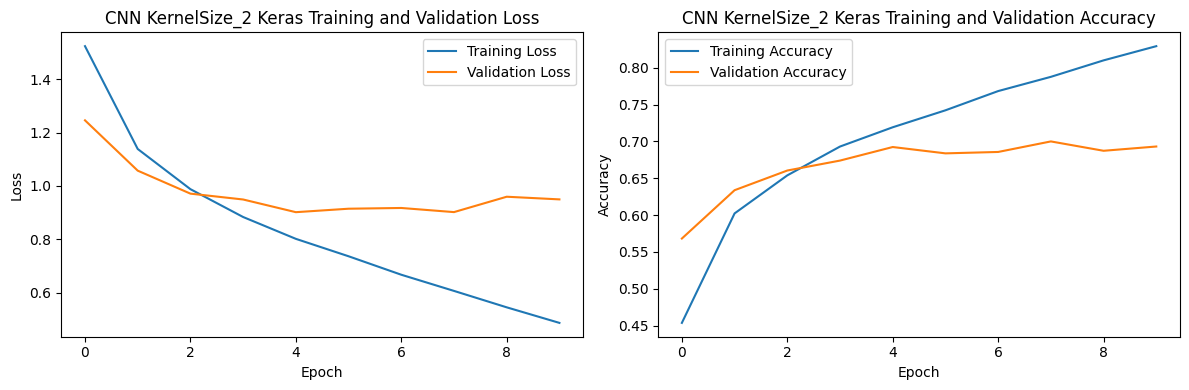

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.6956
Macro F1-Score (Keras): 0.6953

--- Training CNN: KernelSize_3 ---
Conv Layers: [(32, (5, 5)), (64, (5, 5))], Pooling: max, Global Pooling: False


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,402 (2.21 MB)

 Trainable params: 579,402 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.3630 - loss: 1.7333 - val_accuracy: 0.5613 - val_loss: 1.2371
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5876 - loss: 1.1569 - val_accuracy: 0.6284 - val_loss: 1.0699
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6615 - loss: 0.9561 - val_accuracy: 0.6488 - val_loss: 0.9960
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7079 - loss: 0.8343 - val_accuracy: 0.6682 - val_loss: 0.9749
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7432 - loss: 0.7308 - val_accuracy: 0.6756 - val_loss: 0.9647
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7719 - loss: 0.6540 - val_accuracy: 0.6775 - val_loss: 0.9517
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8017 - loss: 0.5711 - val_accuracy: 0.6903 - val_loss: 0.9487
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8296 - loss: 0.4912 - 

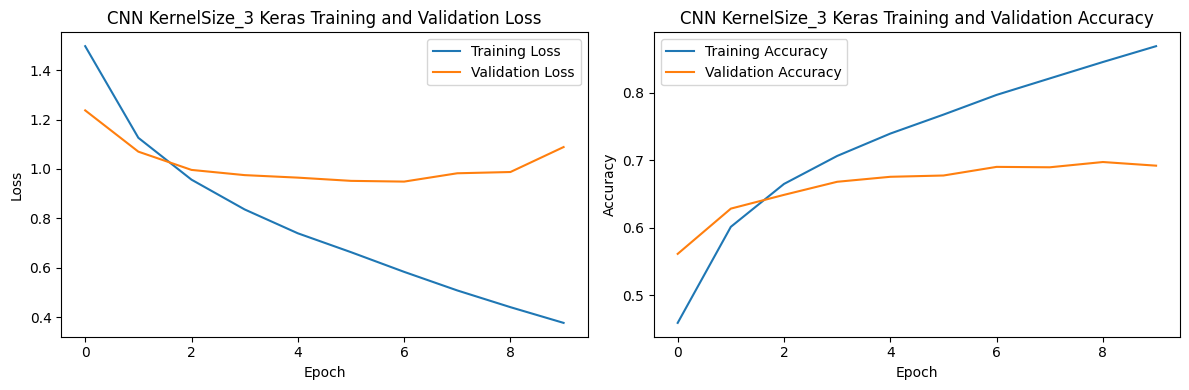

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy (Keras): 0.6848
Macro F1-Score (Keras): 0.6886


In [7]:
print("\n=== 3. Analisis Pengaruh Ukuran Filter ===")
kernel_size_variations = [
    [(32, (2,2)), (64, (2,2))], 
    [(32, (3,3)), (64, (3,3))], 
    [(32, (5,5)), (64, (5,5))]  
]
for i, config in enumerate(kernel_size_variations):
    desc = f"KernelSize_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: best_f1 = f1_score_keras; best_model_cnn = keras_model_variant

penjelasan


=== 4. Analisis Pengaruh Jenis Pooling Layer ===

--- Training CNN: PoolingType_max ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.3634 - loss: 1.7483 - val_accuracy: 0.5691 - val_loss: 1.2458
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5851 - loss: 1.1808 - val_accuracy: 0.6106 - val_loss: 1.1019
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6547 - loss: 1.0036 - val_accuracy: 0.6622 - val_loss: 0.9814
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6863 - loss: 0.9048 - val_accuracy: 0.6595 - val_loss: 0.9928
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7117 - loss: 0.8232 - val_accuracy: 0.6752 - val_loss: 0.9516
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7358 - loss: 0.7606 - val_accuracy: 0.6926 - val_loss: 0.8994
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7624 - loss: 0.6811 - val_accuracy: 0.6957 - val_loss: 0.8953
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7835 - loss: 0.6243 - 

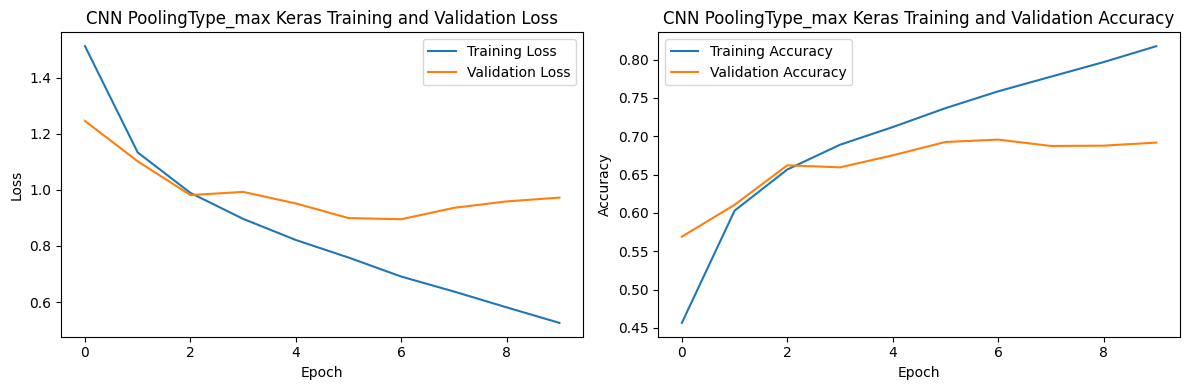

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.6892
Macro F1-Score (Keras): 0.6873

--- Training CNN: PoolingType_avg ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: avg, Global Pooling: False


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool1 (AveragePooling2D)     │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool2 (AveragePooling2D)     │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.3573 - loss: 1.7663 - val_accuracy: 0.5351 - val_loss: 1.3105
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5516 - loss: 1.2676 - val_accuracy: 0.5985 - val_loss: 1.1557
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6076 - loss: 1.1074 - val_accuracy: 0.6297 - val_loss: 1.0631
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6550 - loss: 0.9904 - val_accuracy: 0.6512 - val_loss: 0.9974
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6823 - loss: 0.9057 - val_accuracy: 0.6737 - val_loss: 0.9412
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7072 - loss: 0.8256 - val_accuracy: 0.6776 - val_loss: 0.9223
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7392 - loss: 0.7528 - val_accuracy: 0.6874 - val_loss: 0.9016
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7495 - loss: 0.7047 - 

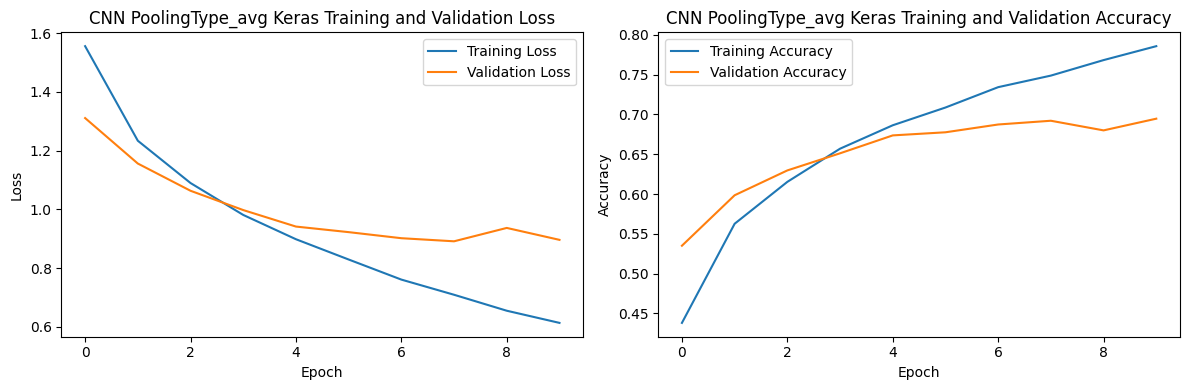

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy (Keras): 0.6957
Macro F1-Score (Keras): 0.6913


In [8]:
print("\n=== 4. Analisis Pengaruh Jenis Pooling Layer ===")
pooling_variations = ['max', 'avg']
base_conv_config = [(32, (3,3)), (64, (3,3))] 
for pool_type in pooling_variations:
    desc = f"PoolingType_{pool_type}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=base_conv_config, pooling_type=pool_type, use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: best_f1 = f1_score_keras; best_model_cnn = keras_model_variant

penjelasan

In [9]:
print("\n--- Ringkasan F1 Scores CNN Variants (Keras Model) ---")
for desc, f1_val in results.items():
    print(f"{desc}: {f1_val:.4f}")


--- Ringkasan F1 Scores CNN Variants (Keras Model) ---
NumConvLayers_1: 0.6350
NumConvLayers_2: 0.6928
NumConvLayers_3: 0.7348
NumFilters_1: 0.6886
NumFilters_2: 0.6966
NumFilters_3: 0.6924
KernelSize_1: 0.6934
KernelSize_2: 0.6953
KernelSize_3: 0.6886
PoolingType_max: 0.6873
PoolingType_avg: 0.6913


penjelasan

# Keras vs Manual CNN Model

In [10]:
cnn_manual = cnn.CNNFromScratch()
cnn_manual.load_keras_model(best_keras_cnn)

Processing Keras layer: conv1 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv1
Processing Keras layer: maxpool1 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: conv2 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv2
Processing Keras layer: maxpool2 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: conv3 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv3
Processing Keras layer: maxpool3 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: flatten of type <class 'keras.src.layers.reshaping.flatten.Flatten'>
Processing Keras layer: dense1 of type <class 'keras.src.layers.core.dense.Dense'>
Processing Keras layer: output_dense of type <class 'keras.src.layers.core.dense.Dense'>


: 

In [11]:
print(f"\nPredicting with Keras CNN on {x_test.shape[0]} samples...")
y_pred_keras_cnn_proba = best_keras_cnn.predict(x_test)

print(f"Predicting with Manual CNN on {x_test.shape[0]} samples...")
y_pred_manual_cnn_proba = cnn_manual.predict(x_test)
                                                                                         
print(f"Keras CNN output shape: {y_pred_keras_cnn_proba.shape}")
print(f"Manual CNN output shape: {y_pred_manual_cnn_proba.shape}")
                                                                                         
f1_keras_cnn = calculate_f1_macro(y_test, y_pred_keras_cnn_proba, num_classes)
f1_manual_cnn = calculate_f1_macro(y_test, y_pred_manual_cnn_proba, num_classes)
                                                                                         
print(f"\nMacro F1-Score (Keras CNN): {f1_keras_cnn:.4f}")
print(f"Macro F1-Score (Manual CNN): {f1_manual_cnn:.4f}")


Predicting with Keras CNN on 10000 samples...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicting with Manual CNN on 10000 samples...
